## Implementation start

## Create a Subset of the Dataset



In [3]:
import os
import random
import pandas as pd
from shutil import copyfile

# Define selected classes - using your chosen classes
selected_classes = [0, 14, 17, 33, 13, 9, 25, 38]
samples_per_class = 100

# Create a new directory for your subset
os.makedirs('project_dataset', exist_ok=True)
for class_id in selected_classes:
    os.makedirs(f'project_dataset/{class_id}', exist_ok=True)

# Read the train.csv file - assuming it's in the same directory as your notebook
train_df = pd.read_csv('Train.csv')

# Filter and sample images
for class_id in selected_classes:
    # Get all images for this class
    class_images = train_df[train_df['ClassId'] == class_id]['Path'].tolist()
    
    # Handle case where class might have fewer than desired samples
    available_samples = min(samples_per_class, len(class_images))
    sampled_images = random.sample(class_images, available_samples)
    
    print(f"Processing class {class_id} with {available_samples} samples")
    
    for img_path in sampled_images:
        # Clean the path - remove any leading/trailing spaces or slashes
        img_path = img_path.strip().replace('/', os.sep).replace('\\', os.sep)
        
        # Construct source path - assuming Train folder is in same directory as notebook
        src = os.path.join('Train', img_path)
        
        # Construct destination path
        dst = os.path.join('project_dataset', str(class_id), os.path.basename(img_path))
        
        # Verify source exists
        if not os.path.exists(src):
            # Try alternative path construction if first attempt fails
            alt_src = os.path.join('Train', str(class_id), os.path.basename(img_path))
            if os.path.exists(alt_src):
                src = alt_src
            else:
                print(f"Warning: File not found - {src}")
                continue
                
        # Copy the file
        try:
            copyfile(src, dst)
        except Exception as e:
            print(f"Error copying {src} to {dst}: {str(e)}")

Processing class 0 with 100 samples
Processing class 14 with 100 samples
Processing class 17 with 100 samples
Processing class 33 with 100 samples
Processing class 13 with 100 samples
Processing class 9 with 100 samples
Processing class 25 with 100 samples
Processing class 38 with 100 samples


## 1. Image Reading Module


Loaded images summary:
Class 0: 100 images
Sample image: 00000_00000_00001.png
Image stats: {'shape': (30, 30, 3), 'min': np.uint8(38), 'max': np.uint8(255), 'mean': np.float64(129.3711111111111), 'dtype': dtype('uint8')}


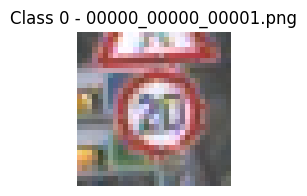

Class 13: 100 images
Sample image: 00013_00001_00003.png
Image stats: {'shape': (30, 28, 3), 'min': np.uint8(35), 'max': np.uint8(103), 'mean': np.float64(49.163492063492065), 'dtype': dtype('uint8')}


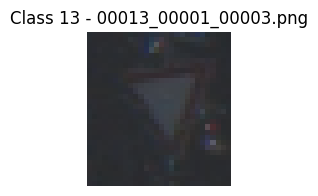

Class 14: 100 images
Sample image: 00014_00000_00000.png
Image stats: {'shape': (45, 48, 3), 'min': np.uint8(72), 'max': np.uint8(255), 'mean': np.float64(179.30756172839506), 'dtype': dtype('uint8')}


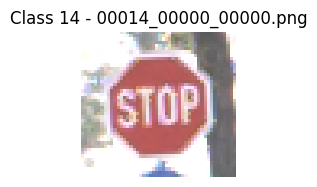

Class 17: 100 images
Sample image: 00017_00000_00004.png
Image stats: {'shape': (33, 27, 3), 'min': np.uint8(11), 'max': np.uint8(69), 'mean': np.float64(23.783015338570895), 'dtype': dtype('uint8')}


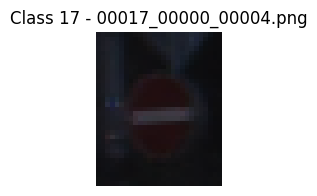

Class 25: 100 images
Sample image: 00025_00000_00001.png
Image stats: {'shape': (46, 49, 3), 'min': np.uint8(0), 'max': np.uint8(255), 'mean': np.float64(141.3089322685596), 'dtype': dtype('uint8')}


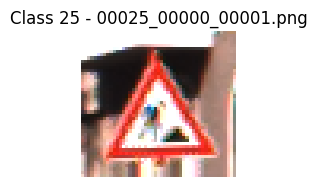

Class 33: 100 images
Sample image: 00033_00000_00002.png
Image stats: {'shape': (27, 27, 3), 'min': np.uint8(23), 'max': np.uint8(129), 'mean': np.float64(49.66209419295839), 'dtype': dtype('uint8')}


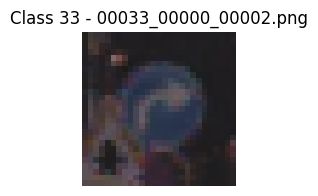

Class 38: 100 images
Sample image: 00038_00000_00008.png
Image stats: {'shape': (34, 32, 3), 'min': np.uint8(0), 'max': np.uint8(255), 'mean': np.float64(139.38817401960785), 'dtype': dtype('uint8')}


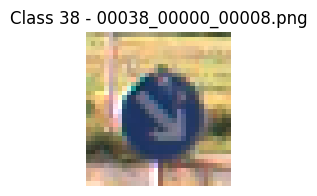

Class 9: 100 images
Sample image: 00009_00000_00002.png
Image stats: {'shape': (34, 35, 3), 'min': np.uint8(25), 'max': np.uint8(255), 'mean': np.float64(80.4624649859944), 'dtype': dtype('uint8')}


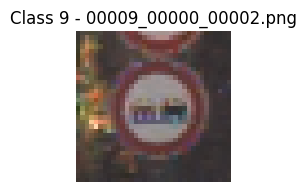

In [14]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def load_all_images(dataset_path='project_dataset'):
    """
    Load all images from the project_dataset directory
    Returns:
        Dictionary {class_id: list of (image_array, filename) tuples}
    """
    image_data = {}
    
    # Get all class directories
    class_dirs = [d for d in os.listdir(dataset_path) 
                 if os.path.isdir(os.path.join(dataset_path, d)) and d.isdigit()]
    
    for class_dir in class_dirs:
        class_id = int(class_dir)
        class_path = os.path.join(dataset_path, class_dir)
        image_data[class_id] = []
        
        # Load all images in this class directory
        for filename in os.listdir(class_path):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(class_path, filename)
                try:
                    img = np.array(Image.open(img_path))
                    image_data[class_id].append((img, filename))
                except Exception as e:
                    print(f"Error loading {img_path}: {str(e)}")
    
    return image_data

def show_image(img_array, title=None, cmap=None):
    """Display a single image"""
    plt.figure(figsize=(2, 2))
    plt.imshow(img_array, cmap=cmap)
    if title:
        plt.title(title)
    plt.axis('off')
    plt.show()

def get_image_stats(img_array):
    """Get basic statistics about an image"""
    if img_array is None:
        return None
    return {
        'shape': img_array.shape,
        'min': np.min(img_array),
        'max': np.max(img_array),
        'mean': np.mean(img_array),
        'dtype': img_array.dtype
    }

# Example usage:
if __name__ == "__main__":
    # Load all images from the dataset
    all_images = load_all_images()
    
    # Print summary
    print("Loaded images summary:")
    for class_id, images in all_images.items():
        print(f"Class {class_id}: {len(images)} images")
        
        # Show first image from each class
        if images:
            img, filename = images[0]
            print(f"Sample image: {filename}")
            print("Image stats:", get_image_stats(img))
            show_image(img, title=f"Class {class_id} - {filename}")

## 2. Filter Implementation


### 1. Mean Filter Implementation

In [24]:
def mean_filter(image, kernel_size=3):
    """Fixed implementation that handles both grayscale and RGB images"""
    pad = kernel_size // 2
    if len(image.shape) == 2:  # Grayscale
        padded = np.pad(image, pad, mode='reflect')
        filtered = np.zeros_like(image)
        kernel = np.ones((kernel_size, kernel_size)) / (kernel_size ** 2)
        
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                neighborhood = padded[i:i+kernel_size, j:j+kernel_size]
                filtered[i,j] = np.sum(neighborhood * kernel)
    else:  # RGB
        padded = np.pad(image, ((pad, pad), (pad, pad), (0, 0)), mode='reflect')
        filtered = np.zeros_like(image)
        kernel = np.ones((kernel_size, kernel_size)) / (kernel_size ** 2)
        
        for channel in range(3):
            for i in range(image.shape[0]):
                for j in range(image.shape[1]):
                    neighborhood = padded[i:i+kernel_size, j:j+kernel_size, channel]
                    filtered[i,j,channel] = np.sum(neighborhood * kernel)
    
    return filtered.astype(np.uint8)

### 2. Gaussian Filter

In [25]:
def gaussian_filter(image, kernel_size=5, sigma=1.0):
    """Fixed Gaussian filter implementation"""
    def gaussian_kernel(size, sigma):
        kernel = np.zeros((size, size))
        k = size // 2
        for i in range(-k, k+1):
            for j in range(-k, k+1):
                kernel[i+k, j+k] = np.exp(-(i**2 + j**2)/(2*sigma**2))
        return kernel / np.sum(kernel)
    
    pad = kernel_size // 2
    kernel = gaussian_kernel(kernel_size, sigma)
    
    if len(image.shape) == 2:  # Grayscale
        padded = np.pad(image, pad, mode='reflect')
        filtered = np.zeros_like(image)
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                filtered[i,j] = np.sum(padded[i:i+kernel_size, j:j+kernel_size] * kernel)
    else:  # RGB
        padded = np.pad(image, ((pad, pad), (pad, pad), (0, 0)), mode='reflect')
        filtered = np.zeros_like(image)
        for channel in range(3):
            for i in range(image.shape[0]):
                for j in range(image.shape[1]):
                    filtered[i,j,channel] = np.sum(padded[i:i+kernel_size, j:j+kernel_size, channel] * kernel)
    
    return filtered.astype(np.uint8)

### 3. Median Filter

In [26]:
def median_filter(image, kernel_size=3):
    """Fixed median filter implementation"""
    pad = kernel_size // 2
    if len(image.shape) == 2:  # Grayscale
        padded = np.pad(image, pad, mode='reflect')
        filtered = np.zeros_like(image)
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                filtered[i,j] = np.median(padded[i:i+kernel_size, j:j+kernel_size])
    else:  # RGB
        padded = np.pad(image, ((pad, pad), (pad, pad), (0, 0)), mode='reflect')
        filtered = np.zeros_like(image)
        for channel in range(3):
            for i in range(image.shape[0]):
                for j in range(image.shape[1]):
                    filtered[i,j,channel] = np.median(padded[i:i+kernel_size, j:j+kernel_size, channel])
    
    return filtered.astype(np.uint8)

### 4. Adaptive Median Filter

In [18]:
def adaptive_median_filter(image, max_window_size=7):
    """
    Apply adaptive median filter to image
    Args:
        image: 2D numpy array (grayscale only)
        max_window_size: maximum window size to consider (odd integer)
    Returns:
        Filtered image
    """
    pad = max_window_size // 2
    filtered = np.zeros_like(image)
    padded = np.pad(image, ((pad, pad), (pad, pad)), mode='reflect')
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            window_size = 3
            while window_size <= max_window_size:
                window = padded[i:i+window_size, j:j+window_size]
                z_min = np.min(window)
                z_max = np.max(window)
                z_med = np.median(window)
                z_xy = image[i,j]
                
                if z_min < z_med < z_max:
                    if z_min < z_xy < z_max:
                        filtered[i,j] = z_xy
                    else:
                        filtered[i,j] = z_med
                    break
                else:
                    window_size += 2
            else:
                filtered[i,j] = z_med
    
    return filtered.astype(np.uint8)

### 5. Unsharp Masking

In [19]:
def unsharp_masking(image, kernel_size=5, sigma=1.0, alpha=1.5):
    """
    Apply unsharp masking to enhance image details
    Args:
        image: 2D or 3D numpy array
        kernel_size: size of Gaussian kernel (odd integer)
        sigma: standard deviation for Gaussian
        alpha: scaling factor for detail enhancement
    Returns:
        Sharpened image
    """
    # Get blurred version using our Gaussian filter
    blurred = gaussian_filter(image, kernel_size, sigma)
    
    # Create mask (original - blurred)
    mask = image.astype(np.float32) - blurred.astype(np.float32)
    
    # Add weighted mask back to original
    sharpened = image.astype(np.float32) + alpha * mask
    sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)
    
    return sharpened

### 6. High boost Filtering

In [20]:
def high_boost_filter(image, kernel_size=5, sigma=1.0, k=1.5):
    """
    Apply high-boost filtering
    Args:
        image: 2D or 3D numpy array
        kernel_size: size of Gaussian kernel
        sigma: standard deviation
        k: boost factor (k=1 for unsharp masking)
    Returns:
        Filtered image
    """
    blurred = gaussian_filter(image, kernel_size, sigma)
    mask = image.astype(np.float32) - blurred.astype(np.float32)
    boosted = image.astype(np.float32) + k * mask
    boosted = np.clip(boosted, 0, 255).astype(np.uint8)
    return boosted

### Example Usage

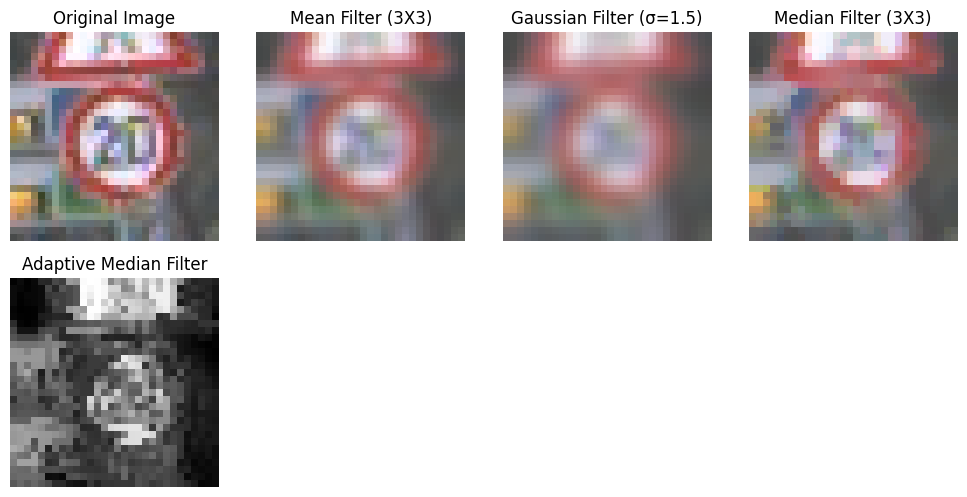

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def display_filters_comparison(original, filtered_images, filter_names):
    """
    Display original image alongside filtered versions in a grid
    
    Args:
        original: Original image array (RGB)
        filtered_images: List of filtered image arrays
        filter_names: List of filter names for titles
    """
    num_filters = len(filtered_images)
    num_cols = 3  # Number of columns in the grid
    num_rows = (num_filters + 1 + num_cols - 1) // num_cols  # Calculate needed rows
    
    plt.figure(figsize=(10, 5*num_rows))  # Adjust figure height based on rows
    
    # Display original image
    plt.subplot(4, 4, 1)
    plt.imshow(original)
    plt.title('Original Image')
    plt.axis('off')
    
    # Display filtered images
    for i, (filt_img, name) in enumerate(zip(filtered_images, filter_names), 1):
        plt.subplot(4, 4, i+1)
        
        # Handle grayscale (adaptive median) vs RGB images
        if len(filt_img.shape) == 2:
            plt.imshow(filt_img, cmap='gray')
        else:
            plt.imshow(filt_img)
            
        plt.title(name)
        plt.axis('off')
    
    # Hide any empty subplots
    for i in range(num_filters + 2, num_rows * num_cols + 1):
        plt.subplot(4, 4, i)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Load and process images
sample_img = np.array(Image.open('project_dataset/0/00000_00000_00001.png').convert('RGB'))
gray_img = np.array(Image.open('project_dataset/0/00000_00000_00001.png').convert('L'))

# Apply all filters
filtered_images = [
    mean_filter(sample_img),
    gaussian_filter(sample_img, sigma=1.5),
    median_filter(sample_img),
    adaptive_median_filter(gray_img)
]

filter_names = [
    'Mean Filter (3X3)',
    'Gaussian Filter (σ=1.5)',
    'Median Filter (3X3)',
    'Adaptive Median Filter'
]

# Display comparison
display_filters_comparison(sample_img, filtered_images, filter_names)

## 3. Color Space Conversion and Segmentation


In [40]:
def rgb_to_hsv_manual(rgb_img):
    """Convert RGB image to HSV color space manually"""
    rgb = rgb_img / 255.0
    hsv = np.zeros_like(rgb)
    
    for i in range(rgb.shape[0]):
        for j in range(rgb.shape[1]):
            r, g, b = rgb[i,j,0], rgb[i,j,1], rgb[i,j,2]
            
            cmax = max(r, g, b)
            cmin = min(r, g, b)
            delta = cmax - cmin
            
            # Hue calculation
            if delta == 0:
                h = 0
            elif cmax == r:
                h = 60 * (((g - b) / delta) % 6)
            elif cmax == g:
                h = 60 * (((b - r) / delta) + 2)
            else:  # cmax == b
                h = 60 * (((r - g) / delta) + 4)
                
            # Saturation calculation
            if cmax == 0:
                s = 0
            else:
                s = delta / cmax
                
            # Value calculation
            v = cmax
            
            hsv[i,j] = [h, s, v]
            
    return hsv

def segment_signs(hsv_img, color='red'):
    """
    Segment traffic signs by color
    Args:
        hsv_img: Image in HSV color space
        color: 'red' or 'blue'
    Returns:
        Binary mask of detected regions
    """
    h, s, v = hsv_img[:,:,0], hsv_img[:,:,1], hsv_img[:,:,2]
    
    if color == 'red':
        # Red has hue near 0 or 180 (circular)
        mask1 = (h >= 0) & (h <= 15) & (s >= 0.4) & (v >= 0.3)
        mask2 = (h >= 165) & (h <= 180) & (s >= 0.4) & (v >= 0.3)
        mask = mask1 | mask2
    elif color == 'blue':
        # Blue has hue between 100-130
        mask = (h >= 100) & (h <= 130) & (s >= 0.4) & (v >= 0.3)
    else:
        raise ValueError("Color must be 'red' or 'blue'")
    
    return mask.astype(np.uint8) * 255

def post_process_mask(mask, min_area=100):
    """
    Apply post-processing to binary mask
    Args:
        mask: Binary mask (0-255)
        min_area: Minimum area for connected components
    Returns:
        Processed binary mask
    """
    # Morphological operations
    kernel = np.ones((3,3), np.uint8)
    processed = mask.copy()
    
    # Opening (erosion followed by dilation)
    processed = cv2.morphologyEx(processed, cv2.MORPH_OPEN, kernel, iterations=2)
    
    # Closing (dilation followed by erosion)
    processed = cv2.morphologyEx(processed, cv2.MORPH_CLOSE, kernel, iterations=2)
    
    # Connected component analysis
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(processed)
    
    # Create output mask
    output = np.zeros_like(processed)
    
    # Skip background (label 0)
    for i in range(1, num_labels):
        if stats[i, cv2.CC_STAT_AREA] >= min_area:
            output[labels == i] = 255
    
    # Hole filling
    contours, _ = cv2.findContours(output, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        cv2.drawContours(output, [cnt], 0, 255, -1)
    
    return output

def visualize_segmentation(original, hsv, mask, processed_mask, color):
    """Visualize segmentation results"""
    plt.figure(figsize=(15, 10))
    
    # Original image
    plt.subplot(2, 2, 1)
    plt.imshow(original)
    plt.title('Original Image')
    plt.axis('off')
    
    # HSV visualization
    plt.subplot(2, 2, 2)
    plt.imshow(hsv)
    plt.title('HSV Color Space')
    plt.axis('off')
    
    # Initial mask
    plt.subplot(2, 2, 3)
    plt.imshow(mask, cmap='gray')
    plt.title(f'Initial {color} Mask')
    plt.axis('off')
    
    # Processed mask
    plt.subplot(2, 2, 4)
    plt.imshow(processed_mask, cmap='gray')
    plt.title(f'Processed {color} Mask')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..359.4230769230769].


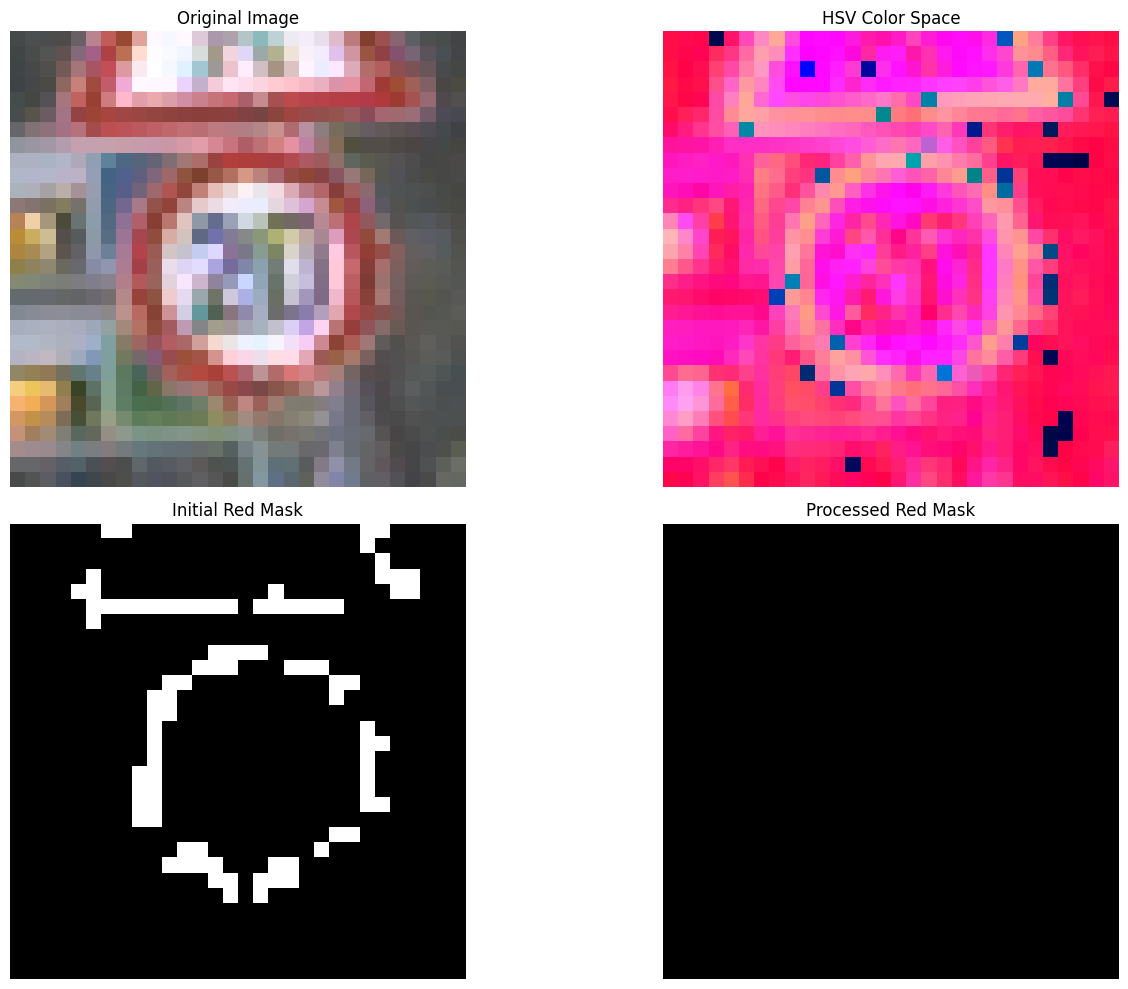

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..359.4230769230769].


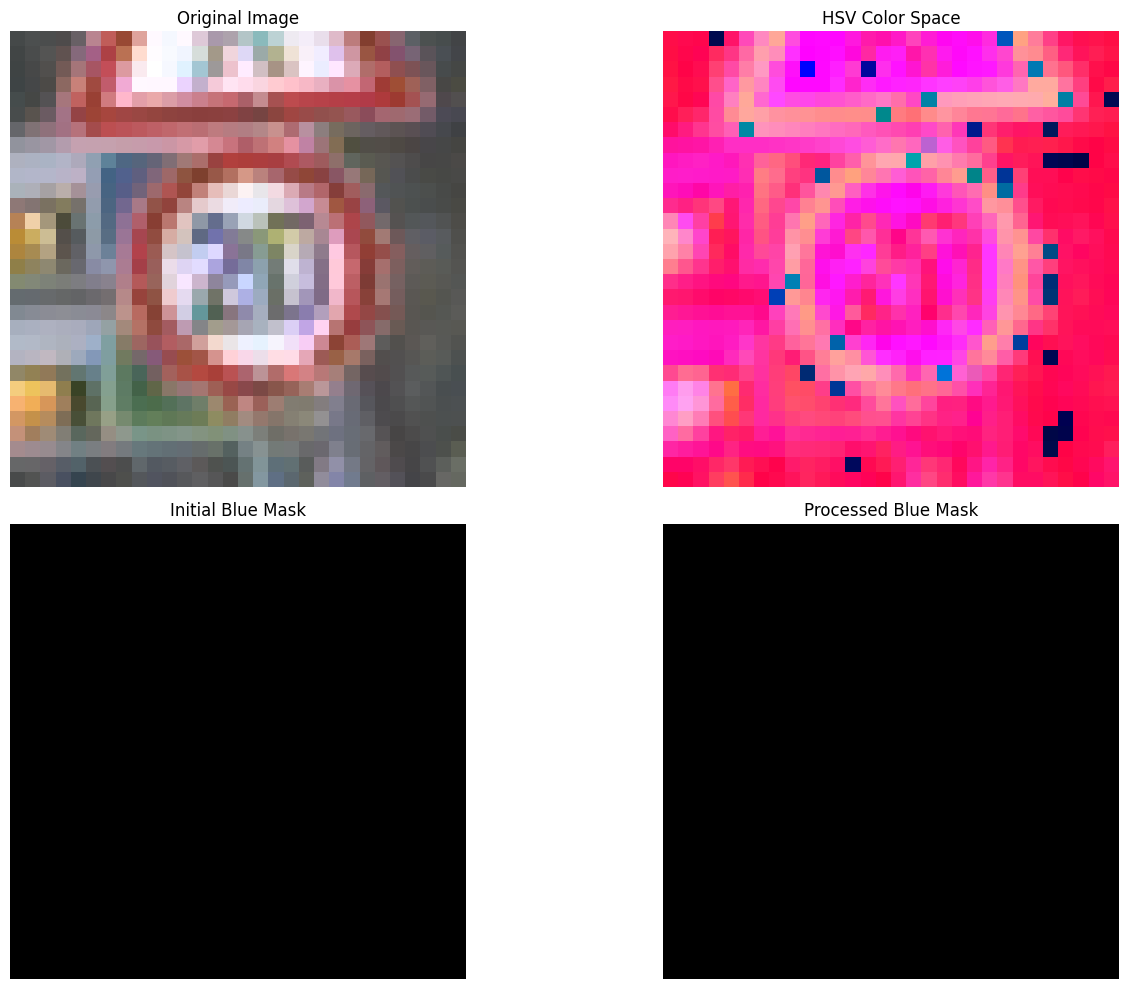

In [44]:
import cv2
# Load sample image
img_path = 'project_dataset/0/00000_00000_00001.png'
original = np.array(Image.open(img_path).convert('RGB'))

# Convert to HSV (using manual method)
hsv_img = rgb_to_hsv_manual(original)

# Segment red signs
red_mask = segment_signs(hsv_img, color='red')
processed_red = post_process_mask(red_mask)
visualize_segmentation(original, hsv_img, red_mask, processed_red, 'Red')

# Segment blue signs
blue_mask = segment_signs(hsv_img, color='blue') 
processed_blue = post_process_mask(blue_mask)
visualize_segmentation(original, hsv_img, blue_mask, processed_blue, 'Blue')

# 4.Edge Detection  

In [46]:
import numpy as np
from scipy.ndimage import convolve
import matplotlib.pyplot as plt

def canny_edge_detector(image, low_threshold=50, high_threshold=100, sigma=1.0):
    """
    Manual implementation of Canny edge detection
    Args:
        image: 2D grayscale image (0-255)
        low_threshold: Low threshold for hysteresis
        high_threshold: High threshold for hysteresis
        sigma: Gaussian blur sigma
    Returns:
        Edge map (binary image)
    """
    # Step 1: Noise reduction with Gaussian blur
    blurred = gaussian_blur(image, sigma)
    
    # Step 2: Gradient computation using Sobel operators
    gradient_magnitude, gradient_direction = sobel_gradient(blurred)
    
    # Step 3: Non-maximum suppression
    suppressed = non_max_suppression(gradient_magnitude, gradient_direction)
    
    # Step 4: Double thresholding and edge tracking
    edges = hysteresis_thresholding(suppressed, low_threshold, high_threshold)
    
    return edges

def gaussian_blur(image, sigma):
    """Manual Gaussian blur implementation"""
    size = int(6*sigma) + 1
    if size % 2 == 0:
        size += 1
    
    # Create 1D Gaussian kernel
    x = np.arange(-(size//2), size//2 + 1)
    kernel_1d = np.exp(-(x**2)/(2*sigma**2))
    kernel_1d /= kernel_1d.sum()
    
    # Apply separable Gaussian filter
    blurred = convolve(image, kernel_1d.reshape(1, -1))
    blurred = convolve(blurred, kernel_1d.reshape(-1, 1))
    
    return blurred

def sobel_gradient(image):
    """Manual Sobel gradient computation"""
    # Sobel kernels
    sobel_x = np.array([[-1, 0, 1],
                       [-2, 0, 2],
                       [-1, 0, 1]])
    
    sobel_y = np.array([[-1, -2, -1],
                       [ 0,  0,  0],
                       [ 1,  2,  1]])
    
    # Compute gradients
    grad_x = convolve(image, sobel_x)
    grad_y = convolve(image, sobel_y)
    
    # Compute magnitude and direction
    magnitude = np.hypot(grad_x, grad_y)
    direction = np.rad2deg(np.arctan2(grad_y, grad_x)) % 180  # 0-180 degrees
    
    return magnitude, direction

def non_max_suppression(magnitude, direction):
    """Manual non-maximum suppression"""
    suppressed = np.zeros_like(magnitude)
    height, width = magnitude.shape
    
    # Quantize angles to 0°, 45°, 90°, 135°
    direction = ((direction + 22.5) // 45) * 45 % 180
    
    for i in range(1, height-1):
        for j in range(1, width-1):
            angle = direction[i,j]
            mag = magnitude[i,j]
            
            # Get neighboring pixels based on gradient direction
            if angle == 0:    # East-West
                neighbors = [magnitude[i,j-1], magnitude[i,j+1]]
            elif angle == 45:  # Northeast-Southwest
                neighbors = [magnitude[i-1,j+1], magnitude[i+1,j-1]]
            elif angle == 90:  # North-South
                neighbors = [magnitude[i-1,j], magnitude[i+1,j]]
            elif angle == 135: # Northwest-Southeast
                neighbors = [magnitude[i-1,j-1], magnitude[i+1,j+1]]
            
            # Keep pixel if it's a local maximum
            if mag >= max(neighbors):
                suppressed[i,j] = mag
    
    return suppressed

def hysteresis_thresholding(image, low, high):
    """Manual hysteresis thresholding"""
    height, width = image.shape
    strong_edges = (image >= high)
    weak_edges = (image >= low) & (image < high)
    
    # Find strong edge coordinates
    strong_y, strong_x = np.where(strong_edges)
    
    # Perform edge tracking by hysteresis
    edges = np.zeros_like(image, dtype=np.uint8)
    edges[strong_edges] = 255
    
    # 8-connectivity neighbors
    neighbors = [(-1,-1), (-1,0), (-1,1),
                 (0,-1),          (0,1),
                 (1,-1),  (1,0),  (1,1)]
    
    # For each strong edge pixel, check its weak neighbors
    for y, x in zip(strong_y, strong_x):
        for dy, dx in neighbors:
            ny, nx = y + dy, x + dx
            if 0 <= ny < height and 0 <= nx < width:
                if weak_edges[ny, nx] and edges[ny, nx] != 255:
                    edges[ny, nx] = 255
                    # Add to strong edges to continue tracking
                    strong_y = np.append(strong_y, ny)
                    strong_x = np.append(strong_x, nx)
    
    return edges

# Example usage


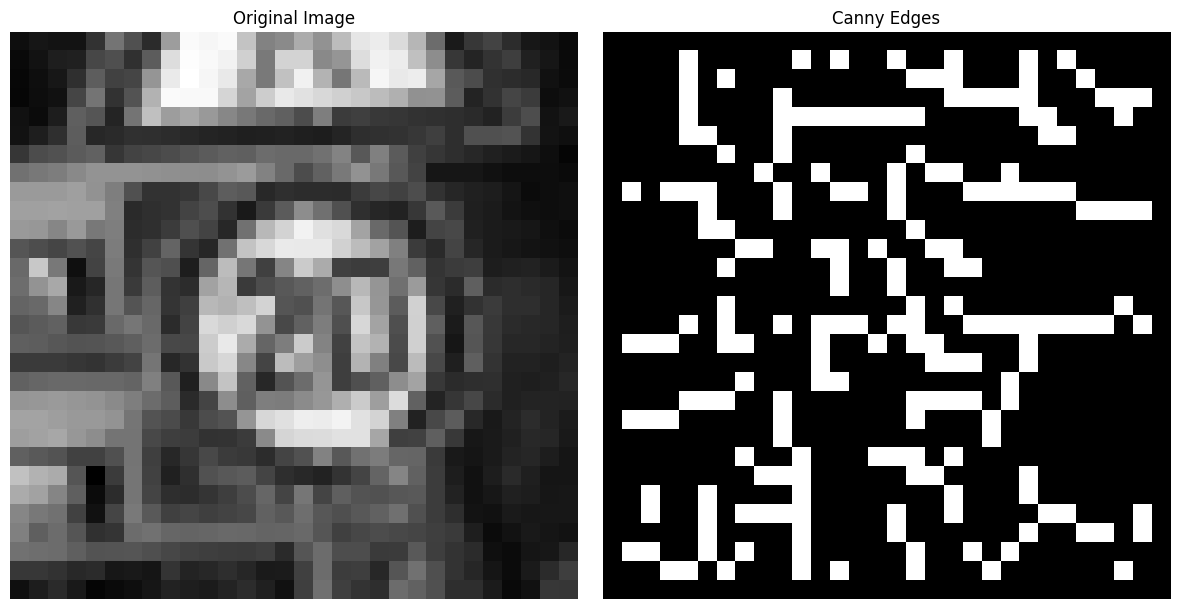

In [47]:

# Load and convert to grayscale
img = np.array(Image.open('project_dataset/0/00000_00000_00001.png').convert('L'))

# Apply Canny edge detection
edges = canny_edge_detector(img, low_threshold=30, high_threshold=100, sigma=1.5)

# Visualization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')

plt.tight_layout()
plt.show()

# 5. Geometric Normalization

In [48]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def get_rotation_matrix(angle_deg):
    """Create 2D rotation matrix in homogeneous coordinates"""
    θ = np.radians(angle_deg)
    return np.array([
        [np.cos(θ), -np.sin(θ), 0],
        [np.sin(θ),  np.cos(θ), 0],
        [0,          0,         1]
    ])

def get_scaling_matrix(sx, sy):
    """Create scaling matrix in homogeneous coordinates"""
    return np.array([
        [sx,  0, 0],
        [0,  sy, 0],
        [0,   0, 1]
    ])

def get_translation_matrix(tx, ty):
    """Create translation matrix in homogeneous coordinates"""
    return np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])

def apply_affine_transform(image, transform_matrix, output_size=(200, 200)):
    """
    Apply affine transform to image using only NumPy
    Args:
        image: Input image (H,W) or (H,W,3)
        transform_matrix: 3x3 affine transformation matrix
        output_size: (width, height) tuple
    Returns:
        Transformed image
    """
    h, w = image.shape[:2]
    if len(image.shape) == 3:
        channels = image.shape[2]
    else:
        channels = 1
        image = image[..., np.newaxis]
    
    # Create output image
    out_h, out_w = output_size[1], output_size[0]
    output = np.zeros((out_h, out_w, channels), dtype=image.dtype)
    
    # Create grid of target coordinates
    y, x = np.indices((out_h, out_w))
    coords = np.stack([x, y, np.ones_like(x)], axis=-1)  # (H,W,3)
    
    # Transform coordinates back to source image
    inv_matrix = np.linalg.inv(transform_matrix)
    src_coords = np.dot(coords, inv_matrix.T)  # (H,W,3)
    
    # Normalize and extract x,y coordinates
    src_x = src_coords[..., 0] / src_coords[..., 2]
    src_y = src_coords[..., 1] / src_coords[..., 2]
    
    # Round to nearest neighbor (simple interpolation)
    src_x = np.round(src_x).astype(int)
    src_y = np.round(src_y).astype(int)
    
    # Only keep coordinates within original image bounds
    mask = (src_x >= 0) & (src_x < w) & (src_y >= 0) & (src_y < h)
    
    # Copy valid pixels
    output[y[mask], x[mask]] = image[src_y[mask], src_x[mask]]
    
    if channels == 1:
        return output[..., 0]  # Remove channel dimension for grayscale
    return output

def normalize_traffic_sign(image, angle_deg=0, output_size=(200, 200)):
    """
    Normalize traffic sign geometry
    Args:
        image: Input image array
        angle_deg: Rotation angle (degrees)
        output_size: Target size (width, height)
    Returns:
        Normalized image
    """
    h, w = image.shape[:2]
    
    # Create transformation pipeline
    # 1. Center the image
    T1 = get_translation_matrix(-w/2, -h/2)
    
    # 2. Rotate
    R = get_rotation_matrix(angle_deg)
    
    # 3. Scale to target size
    scale_x = output_size[0] / w
    scale_y = output_size[1] / h
    S = get_scaling_matrix(scale_x, scale_y)
    
    # 4. Move back from origin
    T2 = get_translation_matrix(output_size[0]/2, output_size[1]/2)
    
    # Combined transformation
    M = T2 @ S @ R @ T1
    
    # Apply transformation
    normalized = apply_affine_transform(image, M, output_size)
    return normalized

def perspective_transform(image, src_points, dst_size=(200, 200)):
    """
    Apply perspective transform using 4 corner points
    Args:
        image: Input image
        src_points: 4 source points (x,y) in order:
                   top-left, top-right, bottom-right, bottom-left
        dst_size: Output size (width, height)
    Returns:
        Transformed image
    """
    h, w = image.shape[:2]
    dst_w, dst_h = dst_size
    
    # Destination points (rectangle)
    dst_points = np.array([
        [0, 0],
        [dst_w-1, 0],
        [dst_w-1, dst_h-1],
        [0, dst_h-1]
    ], dtype=np.float32)
    
    # Create coefficient matrix A
    A = []
    for (x, y), (X, Y) in zip(src_points, dst_points):
        A.append([x, y, 1, 0, 0, 0, -X*x, -X*y])
        A.append([0, 0, 0, x, y, 1, -Y*x, -Y*y])
    A = np.array(A)
    
    # Create vector b
    b = dst_points.reshape(-1)
    
    # Solve for homography coefficients
    h_coeffs = np.linalg.lstsq(A, b, rcond=None)[0]
    H = np.append(h_coeffs, 1).reshape(3, 3)
    
    # Apply perspective transform
    return apply_affine_transform(image, H, dst_size)



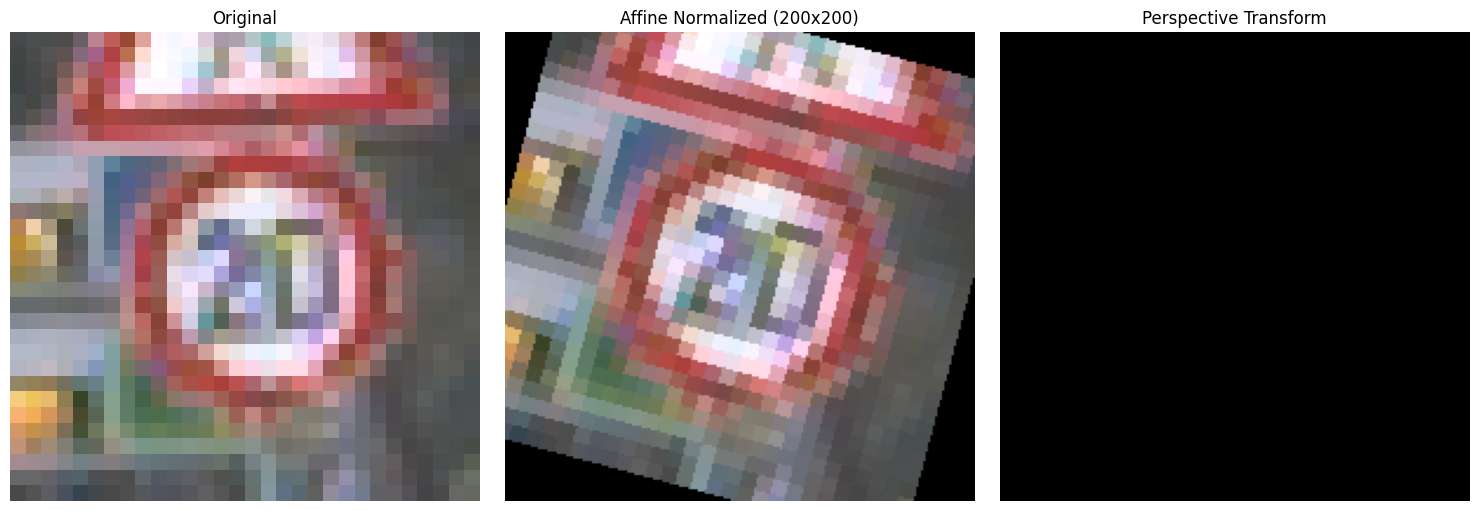

In [49]:

# Load sample image
img = np.array(Image.open('project_dataset/0/00000_00000_00001.png').convert('RGB'))

# 1. Simple rotation and scaling
normalized = normalize_traffic_sign(img, angle_deg=15, output_size=(200, 200))

# 2. Perspective transform (example points)
src_pts = np.array([
    [50, 30],   # top-left
    [180, 20],   # top-right
    [190, 190],  # bottom-right
    [40, 195]    # bottom-left
])
perspective = perspective_transform(img, src_pts)

# Visualization
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(normalized)
plt.title('Affine Normalized (200x200)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(perspective)
plt.title('Perspective Transform')
plt.axis('off')

plt.tight_layout()
plt.show()

# 6. Rule Based Classifications

In [50]:
import numpy as np

def harris_corners(image, k=0.04, threshold=0.01):
    """
    Harris corner detection using only NumPy
    Args:
        image: 2D grayscale image
        k: Harris detector parameter (typically 0.04-0.06)
        threshold: Relative threshold for corner response
    Returns:
        corner_count: Number of detected corners
        corner_coords: List of (y,x) corner coordinates
    """
    # 1. Compute image gradients
    Iy, Ix = np.gradient(image.astype(np.float32))
    
    # 2. Compute products of derivatives
    Ixx = Ix**2
    Iyy = Iy**2
    Ixy = Ix*Iy
    
    # 3. Apply Gaussian smoothing (using simple box filter as approximation)
    window_size = 3
    w = np.ones((window_size, window_size))
    
    Sxx = convolve2d(Ixx, w)
    Syy = convolve2d(Iyy, w)
    Sxy = convolve2d(Ixy, w)
    
    # 4. Compute corner response
    det = Sxx * Syy - Sxy**2
    trace = Sxx + Syy
    R = det - k * trace**2
    
    # 5. Threshold and find corners
    max_R = np.max(R)
    corners = R > threshold * max_R
    
    # Non-maximum suppression (3x3 neighborhood)
    corners = non_max_suppression_corners(R, corners)
    
    # Get corner coordinates
    corner_coords = np.argwhere(corners)
    return len(corner_coords), corner_coords

def convolve2d(image, kernel):
    """Simple 2D convolution implementation"""
    kh, kw = kernel.shape
    ih, iw = image.shape
    pad_h, pad_w = kh//2, kw//2
    
    # Add padding
    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')
    
    # Perform convolution
    output = np.zeros_like(image)
    for i in range(ih):
        for j in range(iw):
            output[i,j] = np.sum(padded[i:i+kh, j:j+kw] * kernel)
    return output

def non_max_suppression_corners(response, corners):
    """Non-max suppression for corner detection"""
    suppressed = np.zeros_like(corners)
    h, w = response.shape
    
    for i in range(1, h-1):
        for j in range(1, w-1):
            if corners[i,j]:
                neighborhood = response[i-1:i+2, j-1:j+2]
                if response[i,j] == np.max(neighborhood):
                    suppressed[i,j] = True
    return suppressed

def calculate_circularity(contour):
    """Calculate circularity: 4π*area/perimeter^2"""
    # Calculate area
    area = len(contour)
    
    # Calculate perimeter (sum of distances between consecutive points)
    perimeter = 0.0
    for i in range(len(contour)):
        x1, y1 = contour[i]
        x2, y2 = contour[(i+1)%len(contour)]
        perimeter += np.sqrt((x2-x1)**2 + (y2-y1)**2)
    
    if perimeter > 0:
        return (4 * np.pi * area) / (perimeter ** 2)
    return 0.0

def find_contour(binary_image):
    """Simple contour finding algorithm (8-connected)"""
    # Find starting point (top-left white pixel)
    h, w = binary_image.shape
    start = None
    for i in range(h):
        for j in range(w):
            if binary_image[i,j] > 0:
                start = (j, i)  # (x,y)
                break
        if start is not None:
            break
    
    if start is None:
        return np.array([])
    
    # 8-connectivity directions (x,y)
    directions = [(1,0), (1,1), (0,1), (-1,1), (-1,0), (-1,-1), (0,-1), (1,-1)]
    
    contour = []
    current = start
    prev_dir = 0
    
    while True:
        contour.append(current)
        x, y = current
        binary_image[y,x] = 0  # Mark as visited
        
        # Check neighbors in order starting from previous direction
        found = False
        for k in range(8):
            dir_idx = (prev_dir + k) % 8
            dx, dy = directions[dir_idx]
            nx, ny = x + dx, y + dy
            
            if 0 <= nx < w and 0 <= ny < h and binary_image[ny,nx] > 0:
                current = (nx, ny)
                prev_dir = (dir_idx + 4) % 8  # Opposite direction
                found = True
                break
        
        if not found or current == start:
            break
    
    return np.array(contour)

def extract_features(normalized_image, normalized_hsv=None):
    """
    Extract all required features from normalized image
    Args:
        normalized_image: Preprocessed image (200x200)
        normalized_hsv: Optional HSV version for hue calculation
    Returns:
        Dictionary of features
    """
    features = {}
    
    # Convert to grayscale if needed
    if len(normalized_image.shape) == 3:
        gray = np.mean(normalized_image, axis=2).astype(np.uint8)
    else:
        gray = normalized_image
    
    # 1. Corner count (Harris)
    corner_count, _ = harris_corners(gray)
    features['corner_count'] = corner_count
    
    # 2. Circularity (needs binary mask)
    binary_mask = (gray > 128).astype(np.uint8) * 255  # Simple threshold
    contour = find_contour(binary_mask.copy())
    features['circularity'] = calculate_circularity(contour)
    
    # 3. Aspect ratio (bounding box)
    if len(contour) > 0:
        xs = contour[:,0]
        ys = contour[:,1]
        width = np.max(xs) - np.min(xs)
        height = np.max(ys) - np.min(ys)
        features['aspect_ratio'] = width / height if height > 0 else 1.0
    else:
        features['aspect_ratio'] = 1.0
    
    # 4. Extent (area / bounding box area)
    if len(contour) > 0:
        area = np.sum(binary_mask > 0)
        bbox_area = width * height
        features['extent'] = area / bbox_area if bbox_area > 0 else 0.0
    else:
        features['extent'] = 0.0
    
    # 5. Average hue (if HSV image provided)
    if normalized_hsv is not None:
        mask = binary_mask > 0
        hue_values = normalized_hsv[:,:,0][mask]
        features['avg_hue'] = np.mean(hue_values) if len(hue_values) > 0 else 0.0
    else:
        features['avg_hue'] = 0.0
    
    return features



In [51]:

# Create a sample normalized image (200x200)
normalized_img = np.random.randint(0, 255, (200, 200, 3), dtype=np.uint8)

# Create sample HSV version
normalized_hsv = np.zeros((200, 200, 3))
normalized_hsv[:,:,0] = np.random.randint(0, 180, (200, 200))  # Hue
normalized_hsv[:,:,1] = 255  # Saturation
normalized_hsv[:,:,2] = 255  # Value

# Extract features
features = extract_features(normalized_img, normalized_hsv)

print("Extracted Features:")
print(f"Corner Count: {features['corner_count']}")
print(f"Circularity: {features['circularity']:.4f}")
print(f"Aspect Ratio: {features['aspect_ratio']:.2f}")
print(f"Extent: {features['extent']:.2f}")
print(f"Average Hue: {features['avg_hue']:.1f}")

Extracted Features:
Corner Count: 2078
Circularity: 0.0000
Aspect Ratio: 1.00
Extent: 0.00
Average Hue: 90.0


# 7. Rule Based Classification

In [52]:
def classify_traffic_sign(features):
    """
    Rule-based classification of traffic signs
    Args:
        features: Dictionary containing extracted features:
            - corner_count
            - circularity
            - aspect_ratio
            - extent
            - avg_hue
    Returns:
        ClassId (integer) according to the dataset mapping
    """
    # Color-based classification first
    is_red = (features['avg_hue'] < 15) or (features['avg_hue'] > 165)
    is_blue = 100 <= features['avg_hue'] <= 130
    
    # Shape features
    corners = features['corner_count']
    circular = features['circularity'] > 0.7  # Perfect circle = 1.0
    triangular = 0.4 < features['circularity'] < 0.6 and features['aspect_ratio'] > 0.8
    octagonal = 0.5 < features['circularity'] < 0.7 and corners >= 8
    rectangular = features['extent'] > 0.7 and features['aspect_ratio'] > 1.2
    
    # Classification rules
    if is_red:
        if octagonal:
            return 14  # Stop sign (red octagon)
        elif circular and features['extent'] > 0.9:
            return 17  # No entry (red circle)
        elif triangular:
            return 13  # Yield (red inverted triangle)
        elif rectangular:
            return 9   # No overtaking (red rectangle)
        elif circular and corners < 5:
            return 0   # Speed limit (red circle with number)
    
    elif is_blue:
        if circular and features['extent'] > 0.85:
            return 33  # Go right (blue circle)
        elif circular and features['extent'] > 0.7:
            return 38  # Keep right (blue circle with arrow)
        elif rectangular:
            return 25  # Construction (blue rectangle)
        elif triangular:
            return 20  # Bend right (blue triangle)
    
    # Default cases for unrecognized signs
    if is_red:
        return 0  # Default to speed limit if red but not matched
    elif is_blue:
        return 33  # Default to directional sign if blue
    else:
        return -1  # Unknown sign

# Feature interpretation guide
FEATURE_DESCRIPTIONS = {
    'corner_count': 'Number of detected corners (higher for polygonal signs)',
    'circularity': '4π×Area/Perimeter² (1.0=perfect circle, ~0.5=triangle)',
    'aspect_ratio': 'Width/height of bounding box',
    'extent': 'Area/bounding box area (measures "filledness")',
    'avg_hue': 'Average hue value (0-180) for color classification'
}

# Class mapping for reference
CLASS_MAPPING = {
    0: "Speed Limit 20",
    13: "Yield",
    14: "Stop",
    17: "No Entry",
    20: "Bend Right",
    25: "Construction",
    33: "Go Right",
    38: "Keep Right",
    9: "No Overtaking"
}

def explain_classification(features, class_id):
    """Generate explanation for classification decision"""
    explanation = []
    
    # Color information
    if (features['avg_hue'] < 15) or (features['avg_hue'] > 165):
        explanation.append("Sign is red (hue: {:.1f})".format(features['avg_hue']))
    elif 100 <= features['avg_hue'] <= 130:
        explanation.append("Sign is blue (hue: {:.1f})".format(features['avg_hue']))
    else:
        explanation.append("Sign color not recognized (hue: {:.1f})".format(features['avg_hue']))
    
    # Shape information
    if features['circularity'] > 0.7:
        explanation.append("Circular shape (circularity: {:.2f})".format(features['circularity']))
    elif 0.4 < features['circularity'] < 0.6:
        explanation.append("Triangular shape (circularity: {:.2f})".format(features['circularity']))
    
    if features['corner_count'] >= 8:
        explanation.append("Polygonal with {} corners".format(features['corner_count']))
    
    # Final decision
    if class_id in CLASS_MAPPING:
        explanation.append("Classified as: {}".format(CLASS_MAPPING[class_id]))
    else:
        explanation.append("Unknown sign type")
    
    return "\n".join(explanation)

# Example usage
if __name__ == "__main__":
    # Example feature sets (would normally come from actual images)
    stop_sign_features = {
        'corner_count': 8,
        'circularity': 0.68,
        'aspect_ratio': 1.05,
        'extent': 0.82,
        'avg_hue': 175.3
    }
    
    yield_sign_features = {
        'corner_count': 3,
        'circularity': 0.52,
        'aspect_ratio': 1.1,
        'extent': 0.75,
        'avg_hue': 5.8
    }
    
    go_right_features = {
        'corner_count': 0,
        'circularity': 0.92,
        'aspect_ratio': 1.02,
        'extent': 0.94,
        'avg_hue': 115.2
    }
    
    # Classify and explain
    for name, features in [("Stop sign", stop_sign_features),
                          ("Yield sign", yield_sign_features),
                          ("Go right sign", go_right_features)]:
        class_id = classify_traffic_sign(features)
        print(f"\n{name} classification:")
        print(explain_classification(features, class_id))


Stop sign classification:
Sign is red (hue: 175.3)
Polygonal with 8 corners
Classified as: Stop

Yield sign classification:
Sign is red (hue: 5.8)
Triangular shape (circularity: 0.52)
Classified as: Yield

Go right sign classification:
Sign is blue (hue: 115.2)
Circular shape (circularity: 0.92)
Classified as: Go Right
